In [23]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from  scipy.special import hyp2f1

plt.rcParams['figure.figsize'] = [15, 10]

matplotlib.rcParams.update({'font.size': 22})

matplotlib.rcParams.update({"axes.facecolor" : "white",
                     "axes.edgecolor":  "grey",'axes.edgecolor':'grey', 'axes.labelcolor':'grey',
                            'xtick.color':'grey', 'ytick.color':'grey','text.color':'grey'})

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [24]:
growth = np.loadtxt('/home/thomas/generic_cosmo/master/build/GrowthFactors.txt')

skip=500
a = growth[skip:,0]

D = growth[skip:,1]
f = growth[skip:,2]

E = growth[skip:,3]
dotE = growth[skip:,4]

Fa = growth[skip:,5]
dotFa = growth[skip:,6]

Fb = growth[skip:,7]
dotFb = growth[skip:,8]

Fc = growth[skip:,9]
dotFc = growth[skip:,10]


In [32]:
Ol = 0.6901
Om =0.3099
G = Ol/Om
H0 = 0.67742*100

def E_SRH(D,D0=1.0, G=G):
    return 1./D0**2*(-3./7.*D**2 - 3.*G/1001.*D**5 - 960.*G**2/3556553.*D**8 - 2040.*G**3/52929877.*D**11 - 1038060000./151269407005717. *G**4 *D**14- 85671376080./61566648651326819. *G**5 *D**17 - \
            1864100579256192./6062846087823581445961.*G**6*D**20)

def Fa_SRH(D,D0=1.0, G=G):
    return 1./D0**3*(-D**3/3. - 4./825.*G*D**6 - 109./215985.*G**2*D**9 - 15408./200362085.*G**3*D**12 - 46316624./3259690760865.*G**4*D**15 - 4677016576./1584861647932563.*G**5*D**18 - \
            330321967776./498174844666802303.*G**6*D**21)

def Fb_SRH(D,D0=1.0, G=G):
    return 1./D0**3*(10*D**3/21. + 538./75075.*G*D**6 + 3581./4849845.*G**2*D**9 + 16644976./148468304985.*G**3*D**12 + 24575717136./1188545340759205.*G**4*D**15 + 11397154716512./2656837684107257343.*G**5*D**18 + \
            1348899757328270624./1400517446287247314016991.*G**6*D**21)

def Fc_SRH(D,D0=1.0, G=G):
    return 1./D0**3*(-D**3/7. - 2*G/1001. *D**6 - 320.*G**2/1524237.*D**9- 1700.*G**3/52929877. *D**12 - 69204000.*G**4/11636108231209. *D**15 - 228457002880.*G**5/184699945953980457. *D**18\
                     - 621366859752064.*G**6/2233680137619214216933.*D**21)


##################################################################################################################################################################################################################


def D_as_a(a):
    return a*np.sqrt(1+G*a**3)*hyp2f1(3./2,5./6.,11./6,-G*a**3)
a_tab=np.logspace(-6,1,100000)
D_tab = D_as_a(a_tab) 
dlnD = np.diff(np.log(D_tab)) / np.diff(a_tab)

D_tab /= D_as_a(1)

def a_as_D(D):
    return np.exp(np.interp(np.log(D),np.log(D_tab),np.log(a_tab)))


def H(a):
    return H0 * np.sqrt(Om/a+Ol*a**2)

def f_(D_,G=G):
    return  (1 - 6.*G/11.* D_**3 + 240.*G**2/2057.*D_**6 - 1200*G**3/47311*D_**9 + 15382080.*G**4/2822243083. *D_**12 - 36723360.*G**5/31044673913.*D_**15 + 126547707648.*G**6/497677167499303.*D_**18)

def dotE_SRH(D_,D0=1.0, G=G):
    return -1./D0*(6./7.*D_ + 15./1001.*G*D_**4 + 7680./3556553.* G**2*D_**7 + 2040./4811807*G**3*D_**10 + 2076120000./21609915286531. *G**4 *D_**13 + 85671376080./3621567567725107.*G**5 *D_**16 + \
            37282011585123840./6062846087823581445961.*G**6*D_**19)

def dotFa_SRH(D_,D0=1.0, G=G):
    return -1./D0**2*(D_**2 + 8./275.*G*D_**5 + 327./71995.*G**2*D_**8 + 184896./200362085.*G**3*D_**11 + 46316624./217312717391.*G**4*D_**14 + 28062099456./528287215977521.*G**5*D_**17 + \
            990965903328./71167834952400329.*G**6*D_**20)

def dotFb_SRH(D_,D0=1.0, G=G):
    return 1./D0**2*(10./7*D_**2. + 1076./25025.*G*D_**5 + 10743./1616615.*G**2*D_**8 + 66579904./49489434995.*G**3*D_**11 + 73727151408./237709068151841.*G**4*D_**14 +68382928299072./885612561369085781. *G**5*D_**17 + \
            1348899757328270624./66691306966059395905571.*G**6*D_**20)

def dotFc_SRH(D_,D0=1.0, G=G):
    return -1./D0**2*(3.*D_**2/7. + 12/1001.*G *D_**5 + 960./508079.*G**2/1524237.*D_**8+ 20400./52929877.*G**3 *D_**11 + 1038060000./11636108231209. *G**4 *D_**14 + 1370742017280./61566648651326819.*G**5*D_**17\
                     + 1864100579256192./319097162517030602419.*G**6*D_**20)



In [26]:
# cornelius = np.loadtxt('thoma.txt')

# a_cor = cornelius[:,0]
# D_cor = cornelius[:,1]
# D0_cor = np.interp(1.0, a_cor , D_cor) 

In [27]:
D0 = np.interp(1.0, a , D) 
fact = 1.6660294958398727 #D0_cornelius/D0 

DoD0=D/D0



# E_th_eds = E_SRH (D,D0,0)
# Fa_th_eds= Fa_SRH(D,D0,0)
# Fb_th_eds= Fb_SRH(D,D0,0)
# Fc_th_eds= Fb_SRH(D,D0,0)

Text(0, 0.5, 'relative error')

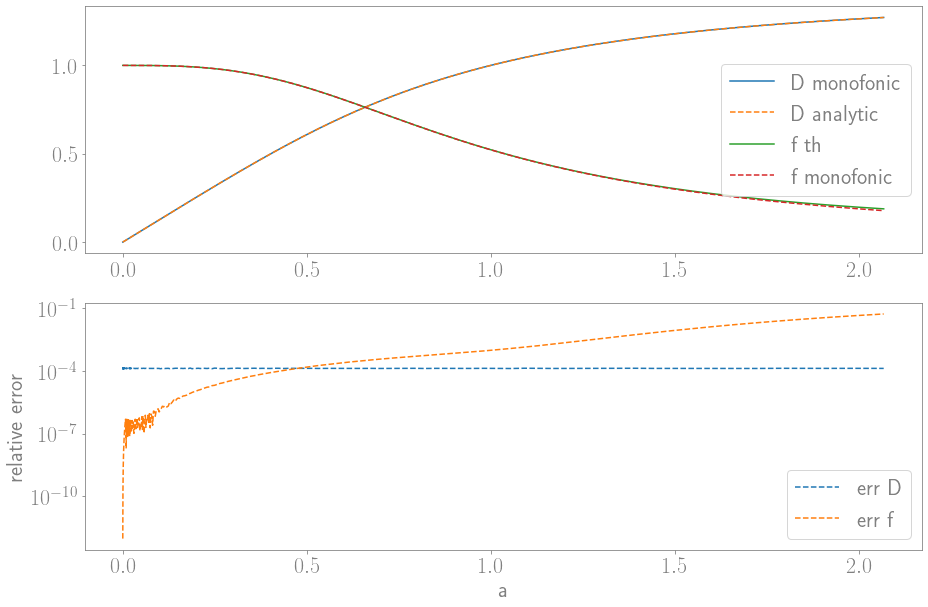

In [28]:
fig,(ax1,ax2) = plt.subplots(2,1)

ax1.plot(a, D/D0, label='D monofonic')
ax1.plot(a, D_as_a(a)/D_as_a(1),'--', label='D analytic')


ax1.plot(a, f_(D*fact),  label='f th')
ax1.plot(a, f,'--', label='f monofonic')


ax1.legend()
ax2.semilogy(a,np.abs((D_as_a(a)/D_as_a(1) - D/D0) / (D_as_a(a)/D_as_a(1))),'--', label='err D')
ax2.plot(a, np.abs((f - f_(D*fact)) / (f_(D*fact))),'--', label='err f')
ax2.legend()
ax2.set_xlabel('a')
ax2.set_ylabel('relative error')

In [59]:
E_th = E_SRH (D*fact,D0*fact)
Fa_th= Fa_SRH(D*fact,D0*fact)
Fb_th= Fb_SRH(D*fact,D0*fact)
Fc_th= Fc_SRH(D*fact,D0*fact)

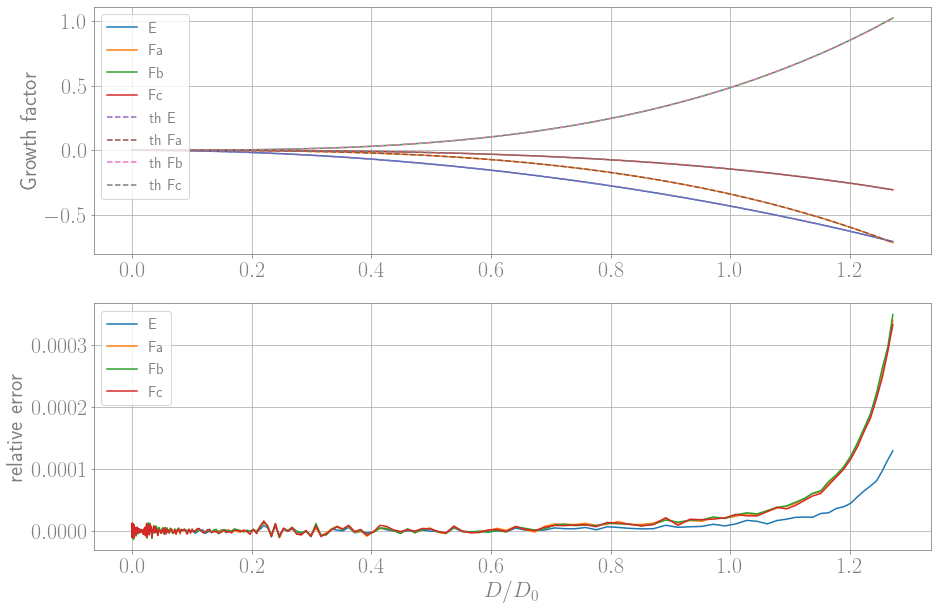

In [60]:

fig,(ax1,ax2) = plt.subplots(2,1)

ax1.plot(DoD0, E/D0**2, label='E')
ax1.plot(DoD0, Fa/D0**3, label='Fa')
ax1.plot(DoD0, Fb/D0**3, label='Fb')
ax1.plot(DoD0, Fc/D0**3, label='Fc')

ax1.plot(DoD0, E_th, '--', label='th E')
ax1.plot(DoD0, Fa_th, '--',label='th Fa')
ax1.plot(DoD0, Fb_th, '--',label='th Fb')
ax1.plot(DoD0, Fc_th, '--',label='th Fc')

ax1.legend(loc='upper left',fontsize=15)
ax1.grid()
ax1.set_ylabel('Growth factor')

ax2.plot(DoD0, (E/D0**2-E_th)/E_th   , label='E')
ax2.plot(DoD0, (Fa/D0**3-Fa_th)/Fa_th, label='Fa')
ax2.plot(DoD0, (Fb/D0**3-Fb_th)/Fb_th, label='Fb')
ax2.plot(DoD0, (Fc/D0**3-Fc_th)/Fc_th, label='Fc')
ax2.set_ylabel('relative error')
ax2.legend(loc='upper left',fontsize=15)
ax2.grid()
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel(r'$ D/D_0$')
plt.savefig('odeVScornelius.pdf')

In [48]:
def get_dot(which,D, fact, D0=1.0, G=G):
    return H(a_as_D(D/D0)) * f_(D*fact) * D/D0 * which(D*fact,D0*fact)
    

dotE_th  = get_dot(dotE_SRH,  D, fact, D0) 
dotFa_th = get_dot(dotFa_SRH, D, fact, D0) 
dotFb_th = get_dot(dotFb_SRH, D, fact, D0)
dotFc_th = get_dot(dotFc_SRH, D, fact, D0)


Text(0.5, 59.51611875389174, '$a$')

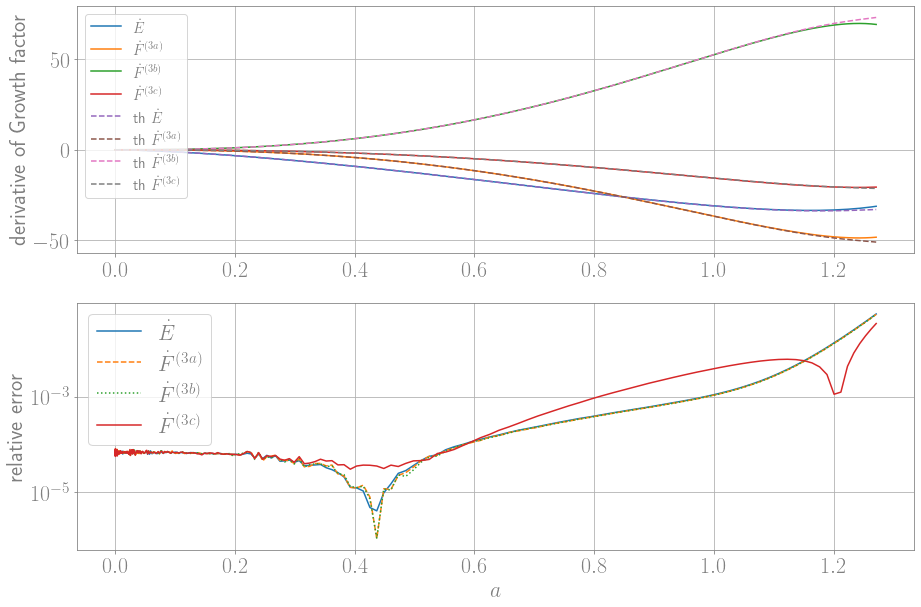

In [49]:


fig,(ax1,ax2) = plt.subplots(2,1)

ax1.plot(DoD0, dotE/D0**2 , label=r'$\dot E$')
ax1.plot(DoD0, dotFa/D0**3, label=r'$\dot F^{(3a)}$')
ax1.plot(DoD0, dotFb/D0**3, label=r'$\dot F^{(3b)}$')
ax1.plot(DoD0, dotFc/D0**3, label=r'$\dot F^{(3c)}$')

ax1.plot(DoD0, dotE_th,'--'  , label=r'th $\dot E$')
ax1.plot(DoD0, dotFa_th, '--', label=r'th $\dot F^{(3a)}$')
ax1.plot(DoD0, dotFb_th,'--' , label=r'th $\dot F^{(3b)}$')
ax1.plot(DoD0, dotFc_th,'--' , label=r'th $\dot F^{(3c)}$')

ax1.legend(loc='upper left',fontsize=15)
ax1.grid()
ax1.set_ylabel('derivative of Growth factor')

ax2.semilogy(DoD0, np.abs((dotE/D0**2-dotE_th)/dotE_th)   , label=r'$\dot E$')
ax2.plot(DoD0, np.abs((dotFa/D0**3-dotFa_th)/dotFa_th), '--',label=r'$\dot F^{(3a)}$')
ax2.plot(DoD0, np.abs((dotFb/D0**3-dotFb_th)/dotFb_th), ':',label=r'$\dot F^{(3b)}$')
ax2.plot(DoD0, np.abs((dotFc/D0**3-dotFc_th)/dotFc_th),label=r'$\dot F^{(3c)}$')
ax2.set_ylabel('relative error')
ax2.legend(loc='upper left',fontsize=15)
ax2.grid()
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel(r'$ D/D_0$')
plt.savefig('DOT_odeVScornelius.pdf')


plt.legend()
# plt.xscale('log')
# plt.yscale('log')
#plt.ylim(-0.01,0.01)

plt.xlabel(r'$a$')

Text(0, 0.5, '$D$')

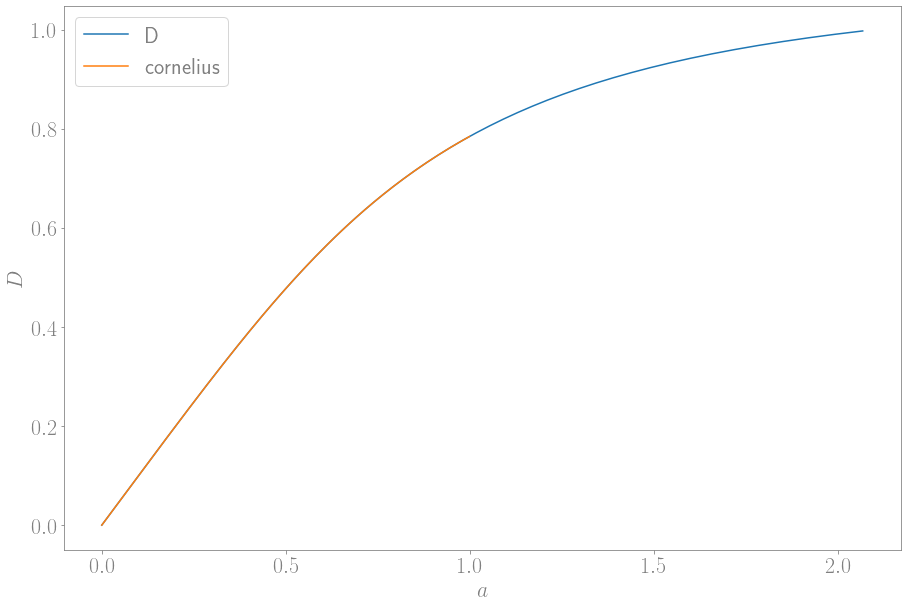

In [337]:


plt.plot(a, np.abs(D)*5/3, label='D')
plt.plot(cornelius[:,0], np.abs(cornelius[:,1]), label='cornelius')

#plt.plot(cornelius[:,0], np.abs(cornelius[:,1])/np.interp(cornelius[:,0],a, np.abs(D)), label='cornelius')


plt.legend()
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel(r'$a$')
plt.ylabel(r'$D$')

In [338]:



E_th_cor = E_SRH (D_cor,D0_cor)
Fa_th_cor= Fa_SRH(D_cor,D0_cor)
Fb_th_cor= Fb_SRH(D_cor,D0_cor)
Fc_th_cor= Fc_SRH(D_cor,D0_cor)

E_th_eds_cor = E_SRH (D_cor,D0_cor,0)
Fa_th_eds_cor= Fa_SRH(D_cor,D0_cor,0)
Fb_th_eds_cor= Fb_SRH(D_cor,D0_cor,0)
Fc_th_eds_cor= Fb_SRH(D_cor,D0_cor,0)



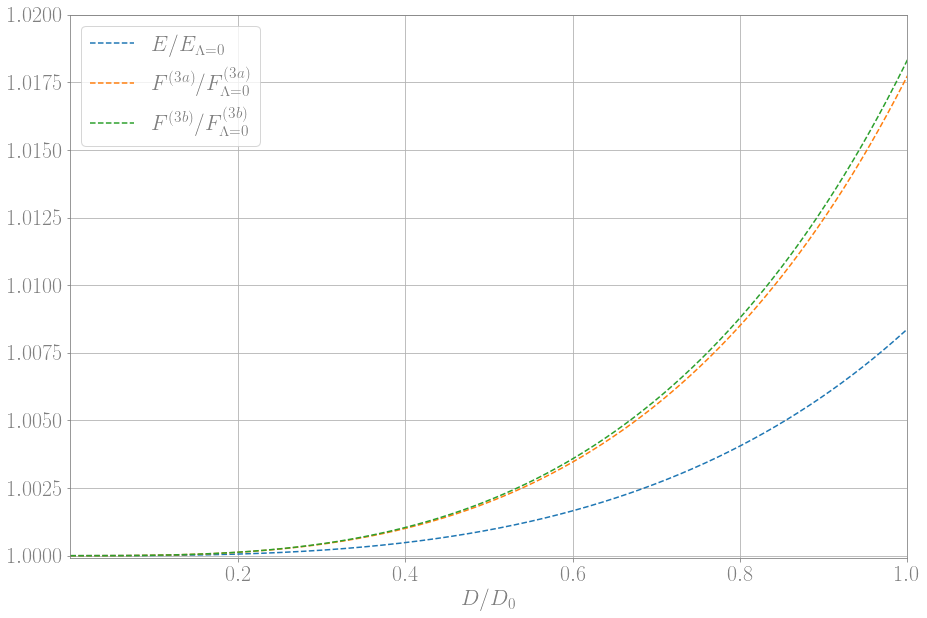

In [398]:

plt.plot(D_cor/D0_cor, E_th_cor/E_th_eds_cor   , '--' ,label=r'$E/E_{\Lambda=0}$')
plt.plot(D_cor/D0_cor, Fa_th_cor/Fa_th_eds_cor ,'--' ,label=r'$F^{(3a)}/F^{(3a)}_{\Lambda=0}$')
plt.plot(D_cor/D0_cor, Fb_th_cor/Fb_th_eds_cor ,'--' ,label=r'$F^{(3b)}/F^{(3b)}_{\Lambda=0}$')
#plt.plot(D_cor/D0_cor, Fc_th_cor/Fc_th_eds_cor ,'--' ,label='th Fc')

plt.legend()
plt.xscale('linear')
plt.yscale('linear')
plt.xlim(10**-5,1)
plt.ylim(0.9999,1.02)
plt.xlabel(r'$D/D_0$')
plt.grid()
plt.savefig('Fig1.pdf')

In [453]:
5/3

1.6666666666666667